# GATHERING DATA

In [2]:
# Load the Packages needed to complete this project
import pandas as pd
import numpy as np
import requests 
import os
import json
import tweepy
from tweepy import OAuthHandler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import CSV and view data in CSV file to ensure it was loaded properly
tae_df = pd.read_csv('twitter-archive-enhanced.csv')
tae_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#Download image prediction file
folder = 'image_predictions'
if not os.path.exists(folder):
    os.makedirs(folder)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(os.path.join(folder,
                       url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [5]:
#Read Image Predictions TSV file and ensure it was loaded properly
image_df = pd.read_csv('image_predictions/image-predictions.tsv', sep = '\t')
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
# For loop to append the tweets into a list
tweet_list = []
with open('tweet_json.txt', 'r') as j:
    for line in j:
        status = json.loads(line)
        tweet_list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count']
                       })
# Create a DataFrame
tweet_df = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
# Esnure the data loaded properly
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


# ASSESSING DATA

I want to first start with a __Visual Assesment__ of the data, looking at the head and tail of each of the datasets.

In [7]:
tae_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
tae_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [9]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
image_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [11]:
tweet_df.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [12]:
tweet_df.tail()

,tweet_id,retweet_count,favorite_count
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132
2353,666020888022790149,532,2535


Now after the visual assesments, I want to the __Programmatic Assesment__ portion of the datasets.

In [13]:
tae_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
# Finding duplicates
tae_df[tae_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [15]:
# Viewing all the numerators, should be no more than 10
tae_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
#View the names in the archive dataset
tae_df['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
Buddy          7
Toby           7
an             7
Daisy          7
Bailey         7
Milo           6
Jax            6
Dave           6
Rusty          6
Scout          6
Leo            6
Bella          6
Jack           6
Oscar          6
Stanley        6
Koda           6
Larry          5
            ... 
Sprinkles      1
Crouton        1
Aldrick        1
Terrenth       1
Hall           1
Dudley         1
Superpup       1
Tuco           1
Dot            1
Maude          1
Divine         1
Steve          1
JD             1
Cecil          1
Kuyu           1
Chesney        1
Jangle         1
Jimbo          1
Ike            1
Mason          1
Cilantro       1
Antony         1
Skittle        1
Stella         1
Gustaf         1
Joey           1
Marty          1
Ralf          

In [17]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
# Finding duplicates
image_df[image_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [19]:
# Finding duplicates
image_df[image_df.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [20]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [21]:
# Finding duplicates
tweet_df[tweet_df.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


### QUALITY FINDINGS

**TAE_DF:**

    Remove Retweets
    Remove columns that are not useful in the analysis
    Erroneous dog names to change to None
    Numerator and Denominator have ludicrous numbers or NaN, need to be converted to a float
    Convert id to string
    
**IMAGE_DF:**

    Remove _ between names
    Capitalize Names in columns p1, p2, p3
    Remove Duplicates
    Convert id to string
    
**TWEET_DF:**

    Convert id to string
    
### TIDINESS FINDINGS

    Move all dog breeds into a single column
    Merge p1, p2, p3 in images_df dataset into 1 column
    Merge all 3 datasets into 1 dataset

# CLEANING DATA

In [22]:
# Creating a copy of each dataset
tae_copy = tae_df.copy()
image_copy = image_df.copy()
tweet_copy = tweet_df.copy()

**_Define_**

Remove all retweets from `TAE_COPY` table 

**_Code_**

In [23]:
tae_copy = tae_copy[tae_copy['retweeted_status_id'].isnull()]

**_Test_**

In [24]:
len(tae_copy[tae_copy['retweeted_status_id'].isnull() == False])

0

In [25]:
tae_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

**_Define_**

Remove columns that are not useful in the analysis in the `TAE_COPY` dataset.

**_Code_**

In [26]:
list(tae_copy)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

In [27]:
tae_copy.drop(['in_reply_to_status_id',
               'in_reply_to_user_id',
               'source',
               'timestamp',
               'retweeted_status_id',
               'retweeted_status_user_id',
               'retweeted_status_timestamp',
               'expanded_urls'],axis=1, inplace=True)

**_Test_**

In [28]:
tae_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(6)
memory usage: 169.9+ KB


**_Define_**

Correct the errenous names with extracting the name from the `text` column

**_Code_**

In [29]:
tae_copy['name'].value_counts()

None        680
a            55
Charlie      11
Lucy         11
Cooper       10
Oliver       10
Tucker        9
Penny         9
Sadie         8
Lola          8
the           8
Winston       8
Toby          7
Daisy         7
Oscar         6
Jax           6
Bailey        6
an            6
Koda          6
Bo            6
Bella         6
Stanley       6
Dave          5
Leo           5
Rusty         5
Scout         5
Buddy         5
Milo          5
Louis         5
Bentley       5
           ... 
Gromit        1
Alfy          1
Damon         1
Edd           1
Peanut        1
Antony        1
Maxwell       1
Cilantro      1
Barry         1
Ralphie       1
Tater         1
Jessiga       1
Mookie        1
Miley         1
Logan         1
Tuco          1
Maude         1
Divine        1
Steve         1
JD            1
Cecil         1
Kuyu          1
Chesney       1
Terrance      1
Jangle        1
Jimbo         1
Paull         1
Dot           1
Ike           1
Lucia         1
Name: name, Length: 956,

In [30]:
tae_copy['name'] = tae_copy['text'].str.extract("(?:This\sis\s|Meet\s)([A-Z][a-zA-Z]*)")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


**_Test_**

In [31]:
tae_copy['name'].fillna('None', inplace=True)
len(tae_copy[tae_copy['name'] == 'None'])

880

In [32]:
tae_copy['name'].value_counts()

None        880
Charlie      10
Lucy         10
Tucker        9
Cooper        9
Oliver        8
Lola          8
Penny         8
Winston       7
Toby          7
Daisy         7
Bo            6
Bailey        6
Koda          6
Sadie         6
Jax           6
Oscar         6
Bella         6
Stanley       6
Scout         5
Rusty         5
Chester       5
Milo          5
Buddy         5
Louis         5
Bear          4
Cassie        4
Scooter       4
Larry         4
Derek         4
           ... 
Superpup      1
Romeo         1
Dutch         1
Dwight        1
Coleman       1
Sweets        1
Ike           1
Creg          1
Paull         1
Jimbo         1
Maxwell       1
Barry         1
Ralphie       1
Tater         1
Jessiga       1
Mookie        1
Miley         1
Logan         1
Tuco          1
Fr            1
Maude         1
Dot           1
Steve         1
JD            1
Cecil         1
Kuyu          1
Chesney       1
Terrance      1
Jangle        1
Lucia         1
Name: name, Length: 882,

In [33]:
tae_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(6)
memory usage: 169.9+ KB


**_Define_**

Correct the errenous data for denominators to 10, if they are not 10, also convert to float.

**_Code_**

In [34]:
tae_copy.head()

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


In [35]:
tae_copy['rating_denominator'] = tae_copy['rating_denominator'].astype(float)

In [36]:
#for index, row in tae_copy.iterrows():
    #if row.rating_denominator != 10.0:
        #tae_copy.set_value(index, 'rating_denominator', 10.0)
        #tae_copy['rating_denominator'].value_counts()

**_Test_**

In [37]:
tae_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null int64
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 169.9+ KB


**_Define_**

Correct Numerators with proper numbers and convert to float, in the `TAE_COPY` dataset

**_Code_**

In [38]:
tae_copy['rating_numerator'] = tae_copy['rating_numerator'].astype(float)

In [39]:
#for index, row in tae_copy.iterrows():
    #if row.rating_numerator > 10.0:
        #tae_copy.set_value(index, 'rating_numerator', 10.0)
        #tae_copy['rating_numerator'].value_counts()

**_Test_**

In [74]:
tae_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id              2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
stage                 2175 non-null object
dtypes: float64(2), object(4)
memory usage: 198.9+ KB


**_Define_**

Convert tweet_id in `TAE_COPY` dataset to a string.

**_Code_**

In [41]:
tae_copy['tweet_id'] = tae_copy['tweet_id'].astype(str)

**_Test_**

In [42]:
tae_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: float64(2), object(7)
memory usage: 249.9+ KB


**_Define_**

Remove _ between words and replace with a space. Capitalize the first letter in each word in the `IMAGE_COPY` dataset

**_Code_**

In [43]:
image_copy['p1'] = image_copy['p1'].str.replace('_', ' ')
image_copy['p2'] = image_copy['p2'].str.replace('_', ' ')
image_copy['p3'] = image_copy['p3'].str.replace('_', ' ')

image_copy['p1'] = image_copy['p1'].str.title()
image_copy['p2'] = image_copy['p2'].str.title()
image_copy['p3'] = image_copy['p3'].str.title()

**_Test_**

In [44]:
image_copy.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**_Define_**

Remove duplicates from `jpg_url` from `IMAGE_COPY` dataset

**_Code_**

In [45]:
len(image_copy[image_copy['jpg_url'].duplicated()])

66

In [46]:
image_copy = image_copy.drop_duplicates(subset = ['jpg_url'], keep='first')

**_Test_**

In [47]:
len(image_copy[image_copy['jpg_url'].duplicated()])

0

**_Define_**

Convert `tweet_id` in `IMAGE_COPY` dataset to a string

**_Code_**

In [48]:
image_copy['tweet_id'] = image_copy['tweet_id'].astype(str)

**_Test_**

In [49]:
image_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2009 non-null object
jpg_url     2009 non-null object
img_num     2009 non-null int64
p1          2009 non-null object
p1_conf     2009 non-null float64
p1_dog      2009 non-null bool
p2          2009 non-null object
p2_conf     2009 non-null float64
p2_dog      2009 non-null bool
p3          2009 non-null object
p3_conf     2009 non-null float64
p3_dog      2009 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


**_Define_**

Convert `tweet_id` in `TWEET_COPY` dataset to string

**_Code_**

In [50]:
tweet_copy['tweet_id'] = tweet_copy['tweet_id'].astype(str)

**_Test_**

In [51]:
tweet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.2+ KB


**_Define_**

Move all the stages of dogs (puppo, doggo, floofer, pupper) into 1 column named stage in the `TAE_DF` dataset.

**_Code_**

In [52]:
tae_copy['stage'] = tae_copy[['puppo', 'pupper', 'doggo', 'floofer']].max(axis=1)
tae_copy.drop(['puppo', 'pupper', 'doggo', 'floofer'], axis=1, inplace=True)

**_Test_**

In [53]:
tae_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 6 columns):
tweet_id              2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
stage                 2175 non-null object
dtypes: float64(2), object(4)
memory usage: 198.9+ KB


In [54]:
tae_copy.head()

,tweet_id,text,rating_numerator,rating_denominator,name,stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,10.0,10.0,Phineas,None
1,892177421306343426,This is Tilly. She's just checking pup on you....,10.0,10.0,Tilly,None
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,10.0,10.0,Archie,None
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,10.0,10.0,Darla,None
4,891327558926688256,This is Franklin. He would like you to stop ca...,10.0,10.0,Franklin,None


**_Define_**

Find the highest confidence predicted dog, come back with only dog type and highest percentace of confidence, with 2 columns, stated `breed` and `max_conf` in `IMAGE_COPY` dataset.  Then remove unecessary columns.

**_Code_**

In [55]:
#Creating a for loop to iterate over each row, ensure that it states true, then bringing back the max confidence level with
#the coresponding breed, storing in 2 
for index, rows in image_copy.iterrows():
    conf = []
    breed = []
    if rows.p1_dog == True:
        conf.append(float(rows.p1_conf))
        breed.append(rows.p1)
    if rows.p2_dog == True:
        conf.append(float(rows.p2_conf))
        breed.append(rows.p2)
    if rows.p3_dog == True:
        conf.append(float(rows.p3_conf))
        breed.append(rows.p3)
    if len(conf) > 0:
        image_copy.set_value(index, 'breed', breed[conf.index(max(conf))])
        image_copy.set_value(index, 'max_conf', max(conf))
        

In [56]:
#Remove uneccesary columns
list(image_copy)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'breed',
 'max_conf']

In [57]:
image_copy.drop(['img_num',
               'p1',
               'p1_conf',
               'p1_dog',
               'p2',
               'p2_conf',
               'p2_dog',
               'p3',
               'p3_conf',
               'p3_dog'],axis=1, inplace=True)

**_Test_**

In [58]:
image_copy.head()

,tweet_id,jpg_url,breed,max_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,Miniature Pinscher,0.560311


**_Define_**

Merge all 3 datasets into 1 called `master_df`

**_Code_**

In [59]:
master_df = pd.merge(tae_copy, image_copy, how = 'left', on = ['tweet_id'])
master_df = pd.merge(master_df, tweet_copy, how = 'left', on = ['tweet_id'])

**_Test_**

In [60]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 11 columns):
tweet_id              2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
stage                 2175 non-null object
jpg_url               1994 non-null object
breed                 1686 non-null object
max_conf              1686 non-null float64
retweet_count         2175 non-null int64
favorite_count        2175 non-null int64
dtypes: float64(3), int64(2), object(6)
memory usage: 203.9+ KB


# STORING DATA

In [61]:
master_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

# ANALYZING & VISUALIZING DATA

In [62]:
#Read in new csv file
master_df = pd.read_csv('twitter_archive_master.csv')
master_df.head()

,tweet_id,text,rating_numerator,rating_denominator,name,stage,jpg_url,breed,max_conf,retweet_count,favorite_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,10.0,10.0,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,8853,39467
1,892177421306343426,This is Tilly. She's just checking pup on you....,10.0,10.0,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,10.0,10.0,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,10.0,10.0,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador Retriever,0.168086,8964,42908
4,891327558926688256,This is Franklin. He would like you to stop ca...,10.0,10.0,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,Basset,0.555712,9774,41048


In [63]:
master_df.describe()

,tweet_id,rating_numerator,rating_denominator,max_conf,retweet_count,favorite_count
count,2.175000e+03,2175.000000,2175.000000,1686.000000,2175.000000,2175.000000
mean,7.371205e+17,9.438621,10.492874,0.549936,2757.987126,8746.022989
std,6.748668e+16,1.474649,7.019084,0.299270,4646.599662,12052.503836
min,6.660209e+17,0.000000,0.000000,0.000010,0.000000,52.000000
25%,6.768432e+17,10.000000,10.000000,0.302892,608.000000,1911.500000
50%,7.098528e+17,10.000000,10.000000,0.550604,1341.000000,4042.000000
75%,7.894226e+17,10.000000,10.000000,0.821962,3220.000000,11107.000000
max,8.924206e+17,10.000000,170.000000,0.999956,79515.000000,132810.000000


**_Taking a look at the most/least tweeted and favorite dogs_**

In [64]:
print('Most Retweeted Dog: ', master_df.breed[master_df.retweet_count == 79515])
print('Least Retweeted Dog: ', master_df.breed[master_df.retweet_count == 0])
print('Most Favorite Dog: ', master_df.breed[master_df.favorite_count == 132810])
print('Least Favorite Dog: ', master_df.breed[master_df.favorite_count == 52])

Most Retweeted Dog:  862    Labrador Retriever
Name: breed, dtype: object
Least Retweeted Dog:  247    NaN
Name: breed, dtype: object
Most Favorite Dog:  348    Lakeland Terrier
Name: breed, dtype: object
Least Favorite Dog:  1116    NaN
Name: breed, dtype: object


**_Visualizing with graphs on different data points_**

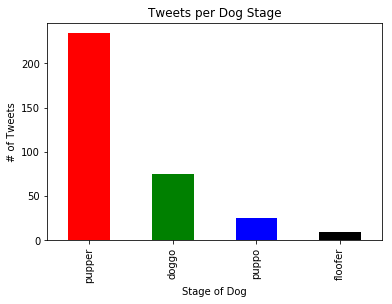

In [65]:
master_df['stage'][master_df['stage'] != 'None'].value_counts().plot(kind = 'bar',color= 'rgbkymc', title='Tweets per Dog Stage')
plt.xlabel('Stage of Dog')
plt.ylabel('# of Tweets');

When filtering out the 'None', the 'pupper' stage was the most tweeted dog.

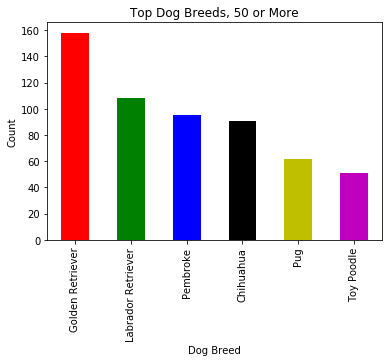

In [66]:
common_breed = master_df.groupby('breed').filter(lambda x: len(x) >= 50)
common_breed['breed'].value_counts().plot(kind='bar',color= 'rgbkymc', title = 'Top Dog Breeds, 50 or More')
plt.xlabel('Dog Breed')
plt.ylabel('Count');

The most common dog breed within this data are Golden Retrievers

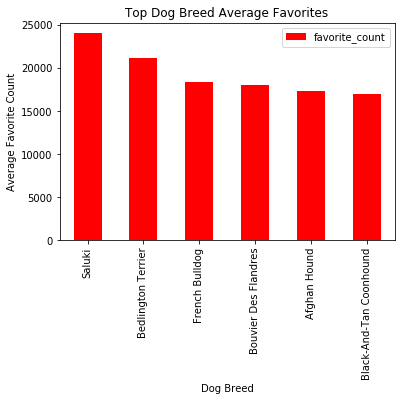

In [67]:
favorite_breed = master_df.groupby('breed')['favorite_count'].mean().reset_index()
favorite_breed.sort_values(by='favorite_count', ascending=False, inplace=True)
fig = favorite_breed.head(6).plot.bar(x='breed', y='favorite_count', color='red', title = 'Top Dog Breed Average Favorites')
fig.set_xlabel('Dog Breed')
fig.set_ylabel('Average Favorite Count');

Looking at the top 6, similar to the common dog breeds, the Saluki has the highest, on average, most favorited dog picture/dog breed.

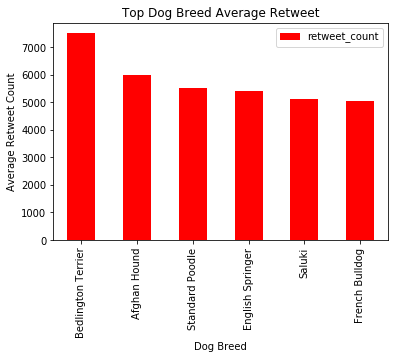

In [68]:
retweet_breed = master_df.groupby('breed')['retweet_count'].mean().reset_index()
retweet_breed.sort_values(by='retweet_count', ascending=False, inplace=True)
fig = retweet_breed.head(6).plot.bar(x='breed', y='retweet_count', color='red', title = 'Top Dog Breed Average Retweet')
fig.set_xlabel('Dog Breed')
fig.set_ylabel('Average Retweet Count');

Looking at the top 6, similar to the average favorite dog breeds, the Bedlington Terrier has the highest, on average, most  retweeted dog breed.

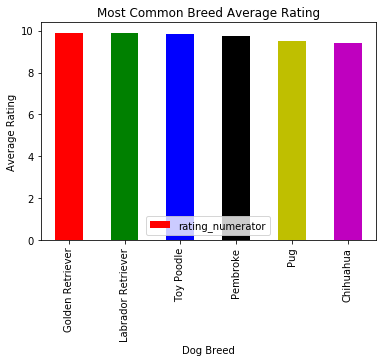

In [69]:
common_breed = ['Golden Retriever','Labrador Retriever','Pembroke','Chihuahua','Pug','Toy Poodle']
rated_breed = master_df[master_df.breed.isin(common_breed)].groupby('breed').rating_numerator.mean().reset_index()
rated_breed.sort_values(by='rating_numerator', ascending=False, inplace=True)

fig=rated_breed.plot.bar(x='breed', y='rating_numerator', title='Most Common Breed Average Rating', color='rgbkymc')
fig.set_xlabel('Dog Breed')
fig.set_ylabel('Average Rating');

In [70]:
rated_breed

,breed,rating_numerator
1,Golden Retriever,9.898734
2,Labrador Retriever,9.870370
5,Toy Poodle,9.823529
3,Pembroke,9.768421
4,Pug,9.500000
0,Chihuahua,9.428571


With the most common breeds, the highest amount, the Golden Retriever, also has the highest rating.

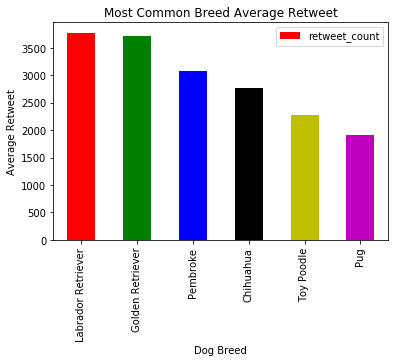

In [71]:
common_breed = ['Golden Retriever','Labrador Retriever','Pembroke','Chihuahua','Pug','Toy Poodle']
rated_breed = master_df[master_df.breed.isin(common_breed)].groupby('breed').retweet_count.mean().reset_index()
rated_breed.sort_values(by='retweet_count', ascending=False, inplace=True)

fig=rated_breed.plot.bar(x='breed', y='retweet_count', title='Most Common Breed Average Retweet', color='rgbkymc')
fig.set_xlabel('Dog Breed')
fig.set_ylabel('Average Retweet');

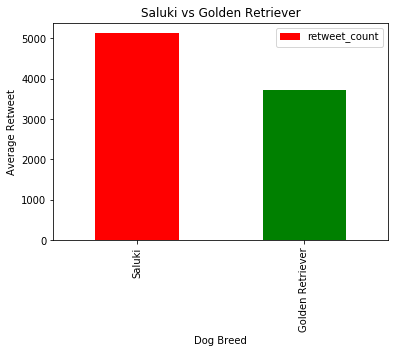

In [72]:
common_breed = ['Golden Retriever','Saluki']
rated_breed = master_df[master_df.breed.isin(common_breed)].groupby('breed').retweet_count.mean().reset_index()
rated_breed.sort_values(by='retweet_count', ascending=False, inplace=True)

fig=rated_breed.plot.bar(x='breed', y='retweet_count', title='Saluki vs Golden Retriever', color='rgbkymc')
fig.set_xlabel('Dog Breed')
fig.set_ylabel('Average Retweet');

Viewing this, the most favorited dog is more retweeted then the most common dog, the Golden Retriever.

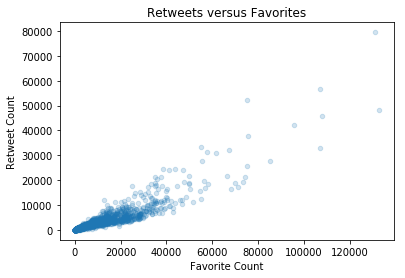

In [73]:
master_df.plot(kind = 'scatter', x='favorite_count', y='retweet_count', title='Retweets versus Favorites', alpha = .2)
plt.xlabel('Favorite Count')
plt.ylabel('Retweet Count')
plt.show();

With looking at if people are retweeting more or favoriting more, by this plot, it looks like people favorite more than retweet.